![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Arithmetic and Bitwise Operations**

#### **In this lesson we'll learn:**
1. Arithmetic Operations
2. Bitwise Operations

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


## **Arithmetic Operations**

These are simple operations that allow us to directly add or subract to the color intensity.

Calculates the per-element operation of two arrays. The overall effect is increasing or decreasing brightness.

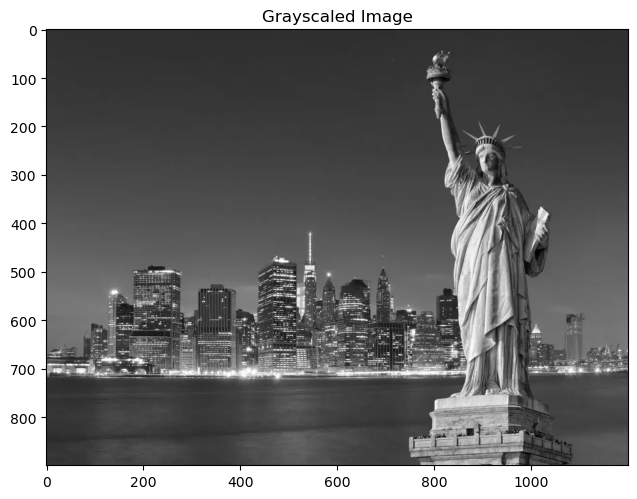

[[49 49 49 ... 47 47 47]
 [49 49 49 ... 47 47 47]
 [49 49 49 ... 47 47 47]
 ...
 [52 52 52 ... 86 86 86]
 [54 54 54 ... 86 86 86]
 [54 54 54 ... 86 86 86]]


In [2]:
# Adding comma zero in cv2.imread loads our image in as a grayscaled image
image = cv2.imread('images/liberty.cms', 0) # the third parameter here in cv2.imread set to 0 tells to read the image as a grayscale one 
imshow("Grayscaled Image",image)
print(image)

# Create a matrix of ones, then multiply it by a scaler of 100 
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100 



In [ ]:
print(M)

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


#### **Increasing Brightness**

### here we see that on simply adding values to image pixels in cases were the value for a particular element in the image matrix is 200 and on adding 100 it will go to 45 as the maximum value that can be assigned to an element will be 255. So we can see in the image where we are simply just adding 100 pixels it becomes darker than the original image as the value goes to 0 and then adds the remaining difference.  But in cv2.add once the number reaches 255 it stays there despite needing to add more value to it

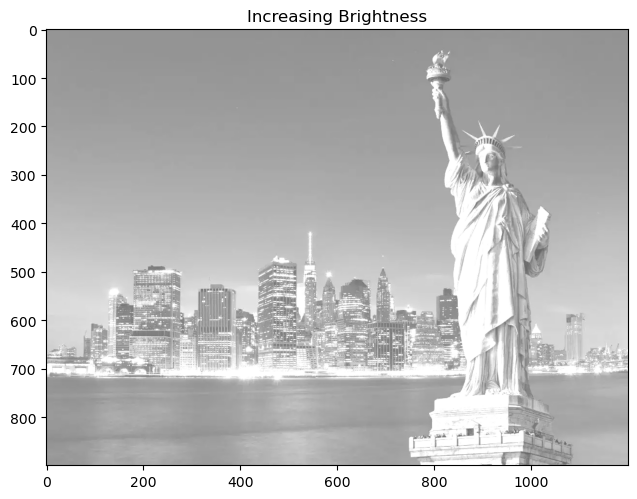

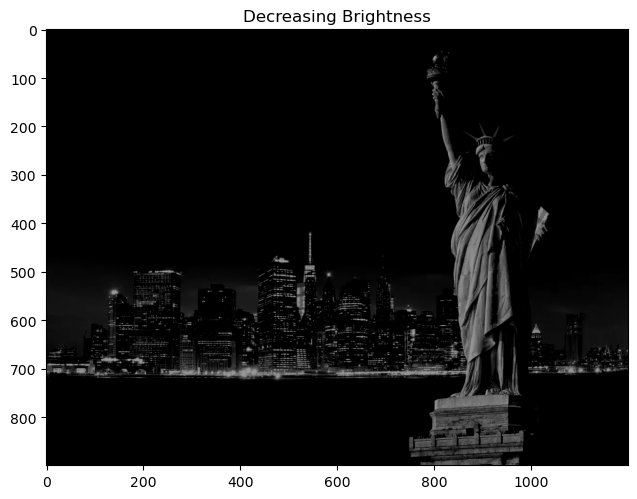

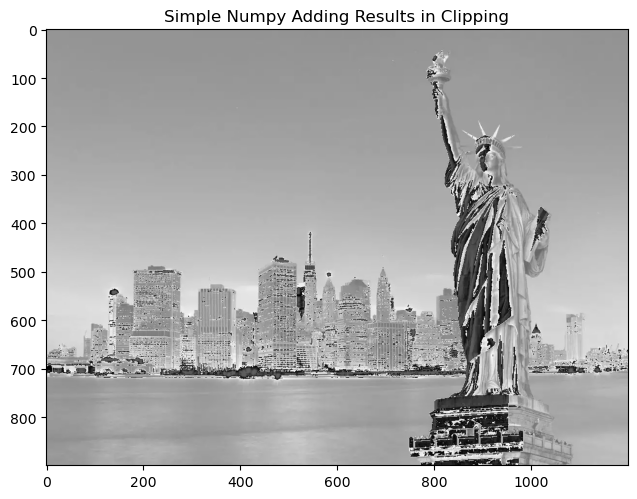

In [7]:
# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(image, M)
imshow("Increasing Brightness", added)
subtracted = cv2.subtract(image,M)
imshow("Decreasing Brightness", subtracted)

# Now if we just added it, look what happens
added2 = image + M 
imshow("Simple Numpy Adding Results in Clipping", added2)

#### **Decreasing Brightness**

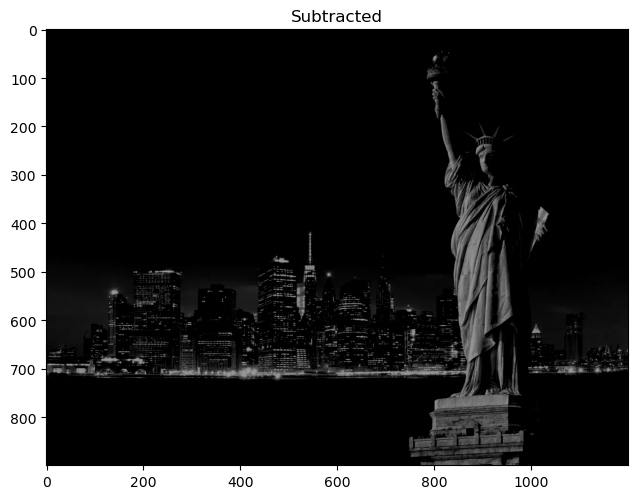

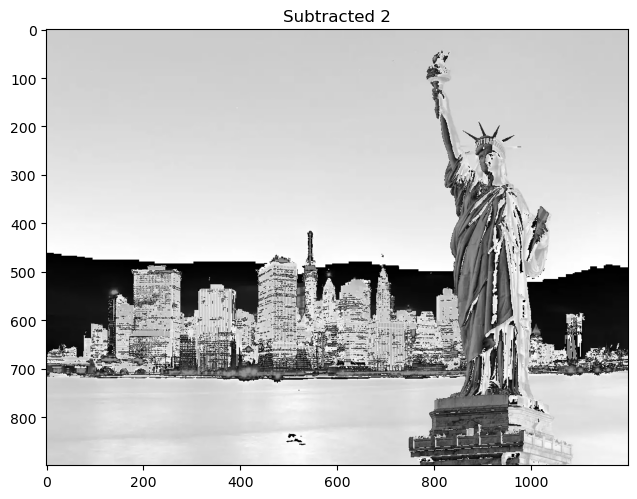

In [8]:
# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(image, M)
imshow("Subtracted", subtracted)

subtracted = image - M 
imshow("Subtracted 2", subtracted)


## **Bitwise Operations and Masking**

To demonstrate these operations let's create some simple images

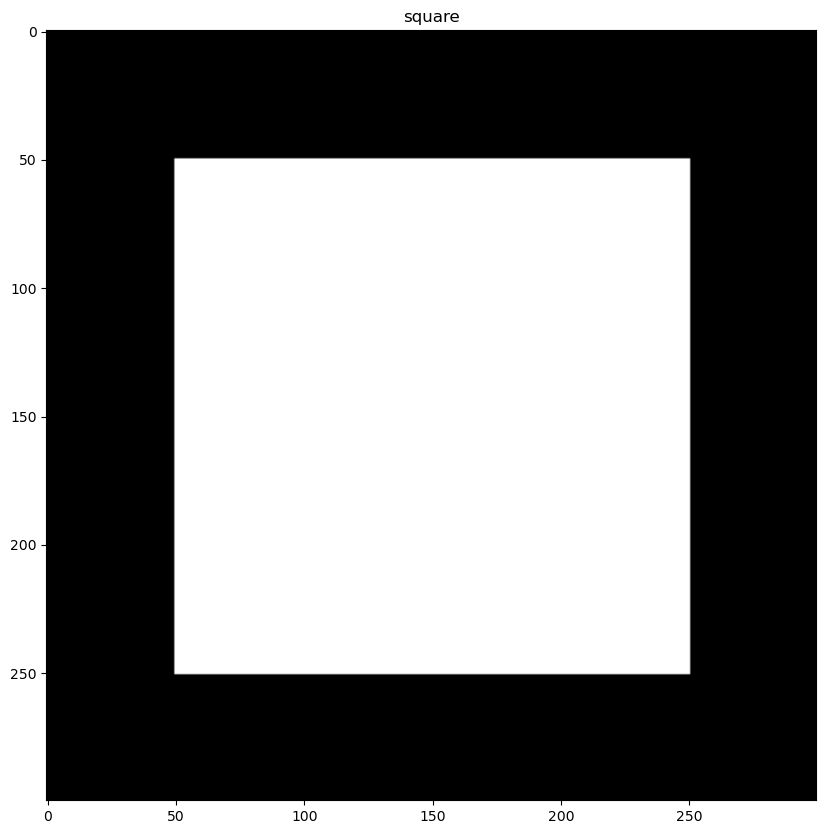

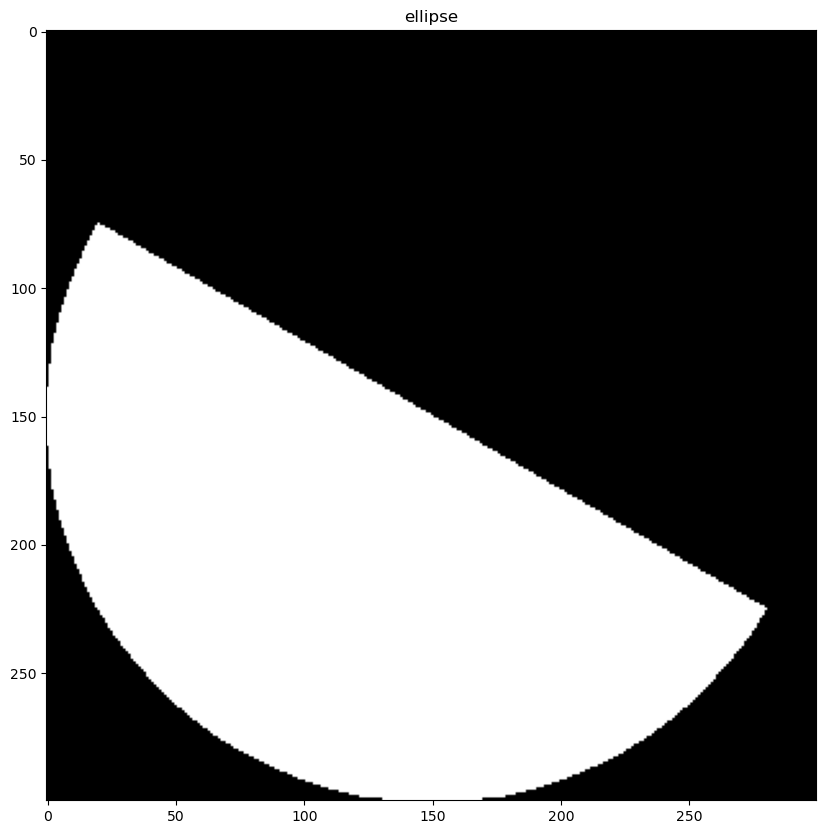

In [9]:
# If you're wondering why only two dimensions, well this is a grayscale image, 

# Making a square
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
imshow("square", square)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
imshow("ellipse", ellipse)

### **Experimenting with some bitwise operations such as AND, OR, XOR and NOT**

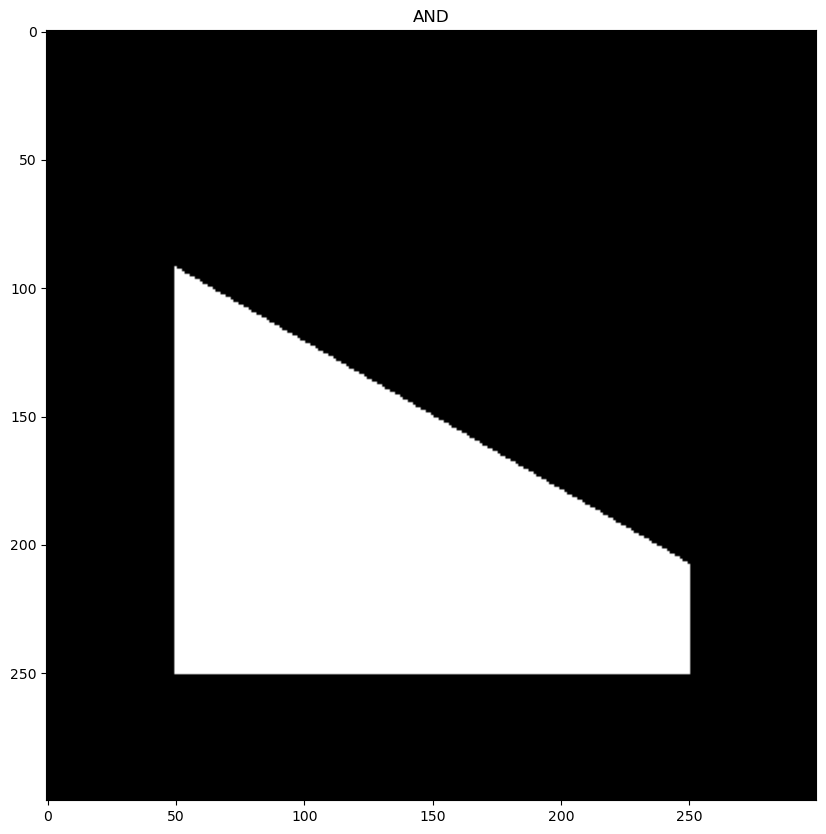

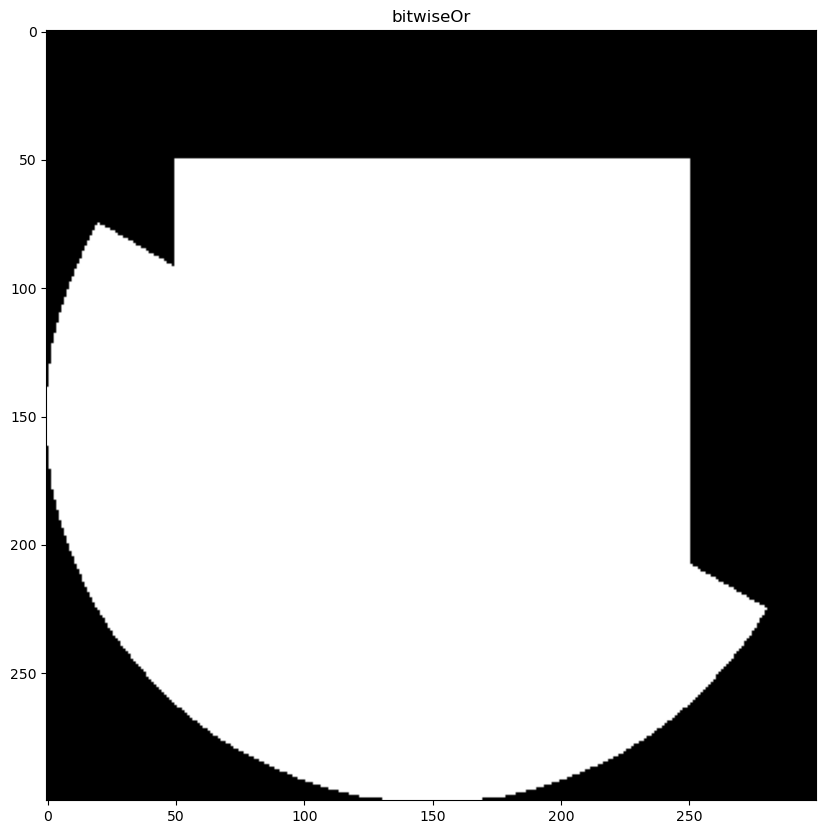

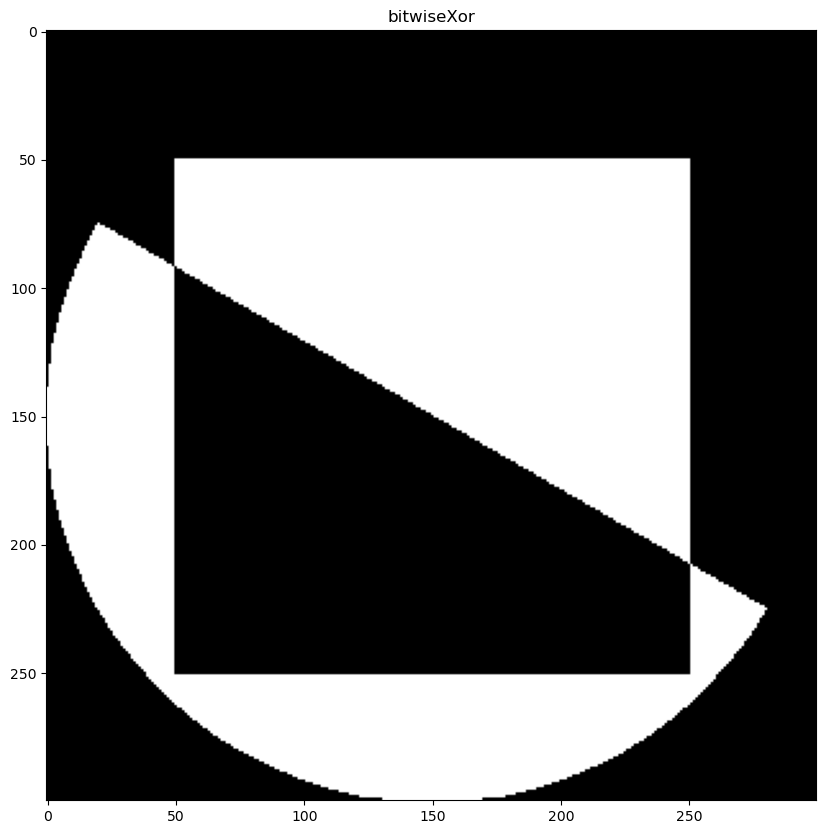

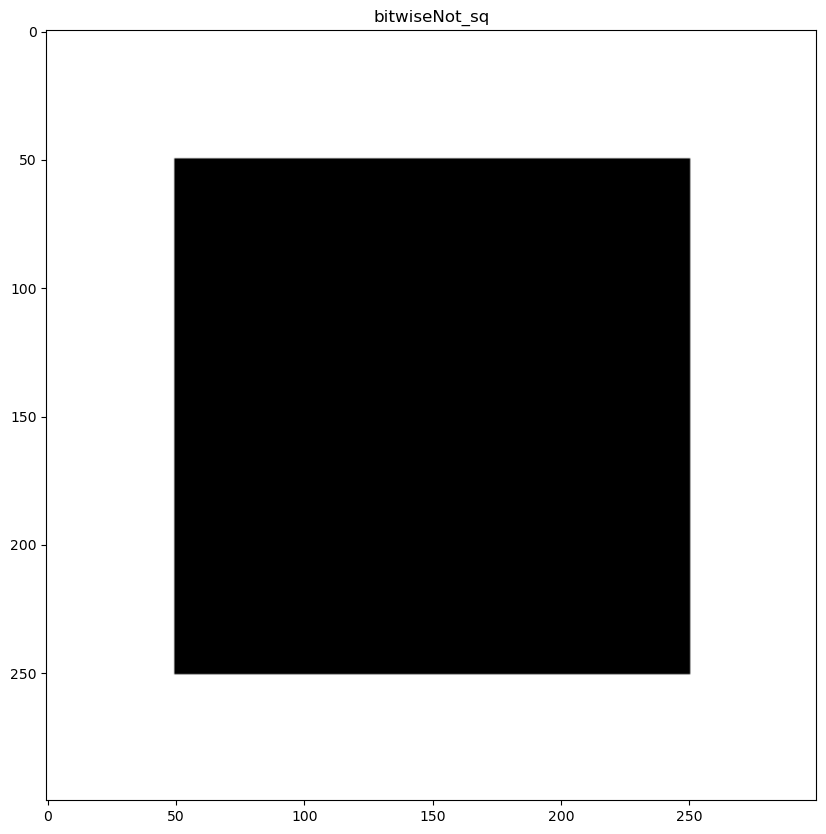

In [10]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
imshow("AND", And)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
imshow("bitwiseOr", bitwiseOr)

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
imshow("bitwiseXor", bitwiseXor)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
imshow("bitwiseNot_sq", bitwiseNot_sq)

# Notice the last operation inverts the image totally